# NETMET LAB 5 - ALIAS RESOLUTION

Date: 9 November 2021

#### Student name: SEBASTIAN CELEITA - Student number: 28716405

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#### Q1.3 Is this sequence of IP-ID can infer aliases :
A: 52491 B: 62439 A: 6041 B: 12883


<function matplotlib.pyplot.show(close=None, block=None)>

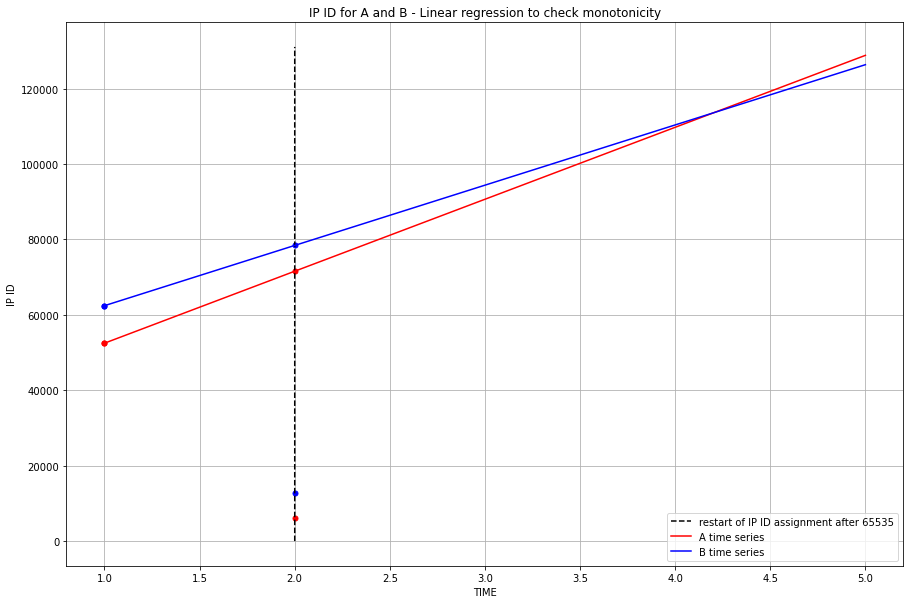

In [25]:
A = [52491,6041]
B = [62439,12883]
A1 = [52491,65535+6041]
B1 = [62439,65535+12883]
T = [1,2]

reg1 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(A1).reshape(-1, 1))
reg2 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(B1).reshape(-1, 1))
X = np.array(np.arange(1,6,1)).reshape(-1,1)
Y1 = reg1.predict(X)
Y2 = reg2.predict(X)
Y = np.arange(1,65535*2,1)
X1 = np.ones_like(Y)*2
plt.figure(figsize=(15,10))
plt.plot(T,A,'o',color='red',ms=5)
plt.plot(T,B,'o',color='blue',ms=5)
plt.plot(T,A1,'o',color='red',ms=5)
plt.plot(T,B1,'o',color='blue',ms=5)
plt.plot(X1,Y,'--',color='black', label='restart of IP ID assignment after 65535')
plt.plot(X,Y1,color='red', label='A time series')
plt.plot(X,Y2,color='blue', label='B time series')
plt.xlabel("TIME")
plt.ylabel("IP ID")
plt.title("IP ID for A and B - Linear regression to check monotonicity")
plt.legend(loc=0)
plt.grid(True)
plt.show


**Q1.3** Analyze the IP-ID header in Wireshark and manually try to infer if the two IP addresses are aliases :

**A: 186.159.6.105 =** [49619,49629,49636,49647,49662,49676,49687,49692,49702,49715]

**B: 186.159.7.105 =** [35890,36076,36151,36389,36609,36768,36816,36908,36993,37135]


Is time series A monotonically increasing?  True
Is time series B monotonically increasing?  True


<function matplotlib.pyplot.show(close=None, block=None)>

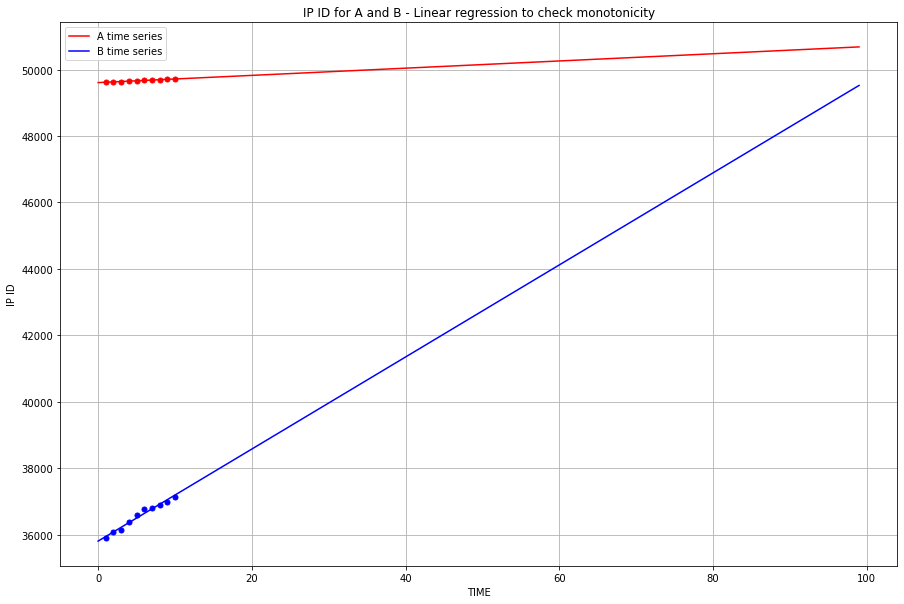

In [59]:
A = [49619,49629,49636,49647,49662,49676,49687,49692,49702,49715]
B = [35890,36076,36151,36389,36609,36768,36816,36908,36993,37135]
T = [1,2,3,4,5,6,7,8,9,10]

def monotonic(x):
    dx = np.diff(x)
    return np.all(dx <= 0) or np.all(dx >= 0)

print("Is time series A monotonically increasing? ",monotonic(A))
print("Is time series B monotonically increasing? ",monotonic(B))

reg1 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(A).reshape(-1, 1))
reg2 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(B).reshape(-1, 1))
X = np.array(np.arange(0,100,1)).reshape(-1,1)
Y1 = reg1.predict(X)
Y2 = reg2.predict(X)
plt.figure(figsize=(15,10))
plt.plot(T,A,'o',color='red',ms=5)
plt.plot(T,B,'o',color='blue',ms=5)
plt.plot(X,Y1,color='red', label='A time series')
plt.plot(X,Y2,color='blue', label='B time series')
plt.xlabel("TIME")
plt.ylabel("IP ID")
plt.title("IP ID for A and B - Linear regression to check monotonicity")
plt.legend(loc=0)
plt.grid(True)
plt.show




## IP IDENTIFIER METHOD

In the following section, we will explore a basic algorithm to validate Monotonic ID-Based Alias Resolution (MIDAR) based on the following stages:
- Time series with shorter sampling intervals
- Validate if the time series are monotonically increasing
- Validate if a random pair of time series form a single merged time series
- Use ICMP probing method

We will focus on Discovery and Elimination steps for 4 time series (the very same as the Fingerprint example)

**A: 72.14.221.62 =** [31673,31775,31893,31947,32189,32358,32570,32722,32922,32954]
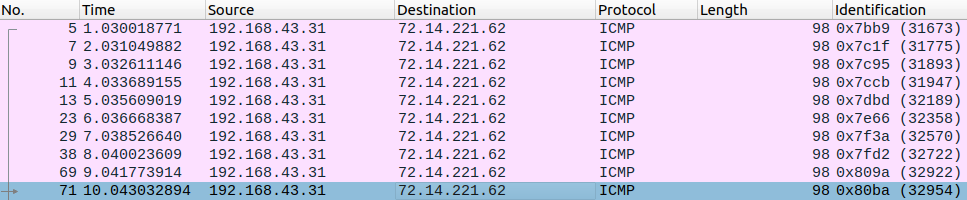

**B: 72.14.211.26 =** [57117,57276,57489,57677,57785,57892,57941,58166,58192,58364]
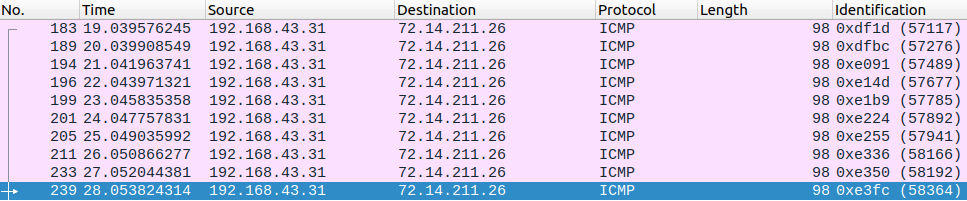

**C: 72.14.238.52 =** [36686,36776,36943,37078,37108,37201,37376,37606,37741,37819]
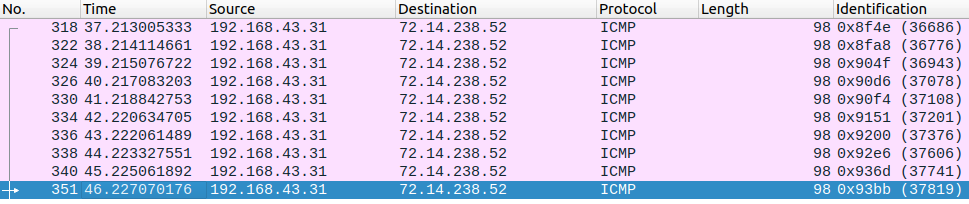

**D: 72.14.238.54 =** [20536,20732,20937,21162,21170,21207,21364,21481,21570,21789]
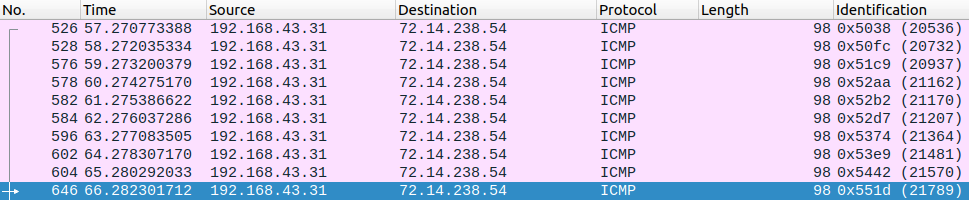



STAGE 1 - Load Time Series made by ICMP probing method and captured with Wireshark
Time Series A = [31673, 31775, 31893, 31947, 32189, 32358, 32570, 32722, 32922, 32954]
Time Series A = [31673, 31775, 31893, 31947, 32189, 32358, 32570, 32722, 32922, 32954]
Time Series A = [31673, 31775, 31893, 31947, 32189, 32358, 32570, 32722, 32922, 32954]
Time Series A = [31673, 31775, 31893, 31947, 32189, 32358, 32570, 32722, 32922, 32954]

STAGE 2 - Validate if each time series is monotonically increasing, if true then will be considered for next stage
Is time series A monotonically increasing?  True
Is time series B monotonically increasing?  True
Is time series C monotonically increasing?  True
Is time series D monotonically increasing?  True
Slope Time series A [[156.00606061]]
Slope Time series B [[132.84242424]]
Slope Time series C [[128.81212121]]
Slope Time series D [[124.27878788]]

OBSERVATIONS:We have applied a simple algorithm for 4 time series with different IPs, sampling 10 times in t

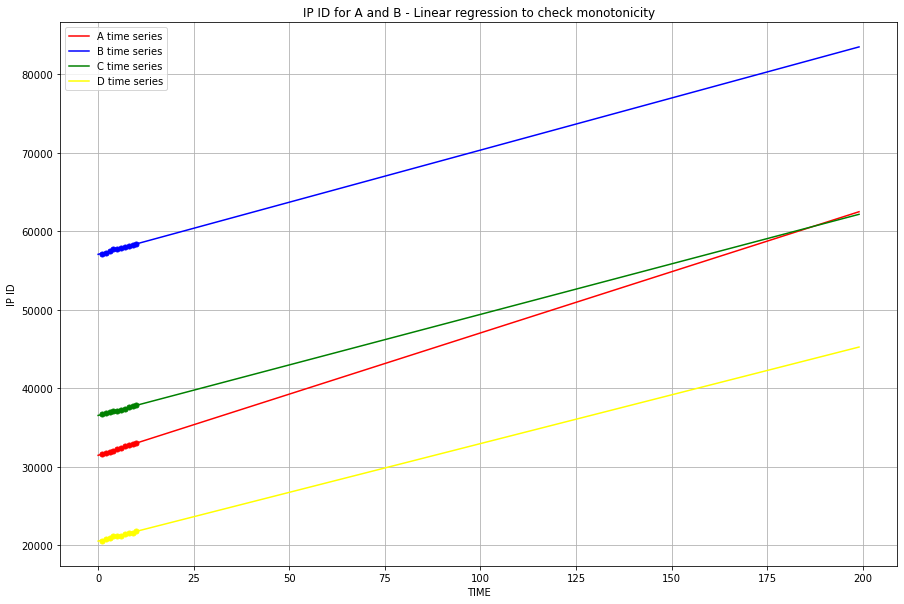

In [71]:
from scipy import stats
def monotonic(x):
    dx = np.diff(x)
    return np.all(dx <= 0) or np.all(dx >= 0)

#STAGE 1: 
A = [31673,31775,31893,31947,32189,32358,32570,32722,32922,32954]
B = [57117,57276,57489,57677,57785,57892,57941,58166,58192,58364]
C = [36686,36776,36943,37078,37108,37201,37376,37606,37741,37819]
D = [20536,20732,20937,21162,21170,21207,21364,21481,21570,21789]
T = [1,2,3,4,5,6,7,8,9,10]

print("STAGE 1 - Load Time Series made by ICMP probing method and captured with Wireshark")
print("Time Series A =",A)
print("Time Series A =",A)
print("Time Series A =",A)
print("Time Series A =",A)

#STAGE 2:
print("\nSTAGE 2 - Validate if each time series is monotonically increasing, if true then will be considered for next stage")
print("Is time series A monotonically increasing? ",monotonic(A))
print("Is time series B monotonically increasing? ",monotonic(B))
print("Is time series C monotonically increasing? ",monotonic(C))
print("Is time series D monotonically increasing? ",monotonic(D))

#STAGE 3:
reg1 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(A).reshape(-1, 1))
reg2 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(B).reshape(-1, 1))
reg3 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(C).reshape(-1, 1))
reg4 = LinearRegression().fit(np.array(T).reshape(-1, 1), np.array(D).reshape(-1, 1))
X = np.array(np.arange(0,200,1)).reshape(-1,1)
Y1 = reg1.predict(X)
Y2 = reg2.predict(X)
Y3 = reg3.predict(X)
Y4 = reg4.predict(X)
plt.figure(figsize=(15,10))
plt.plot(T,A,'o',color='red',ms=5)
plt.plot(T,B,'o',color='blue',ms=5)
plt.plot(T,C,'o',color='green',ms=5)
plt.plot(T,D,'o',color='yellow',ms=5)
plt.plot(X,Y1,color='red', label='A time series')
plt.plot(X,Y2,color='blue', label='B time series')
plt.plot(X,Y3,color='green', label='C time series')
plt.plot(X,Y4,color='yellow', label='D time series')
plt.xlabel("TIME")
plt.ylabel("IP ID")
plt.title("IP ID for A and B - Linear regression to check monotonicity")
plt.legend(loc=0)
plt.grid(True)
plt.show

print("Slope Time series A",reg1.coef_)
print("Slope Time series B",reg2.coef_)
print("Slope Time series C",reg3.coef_)
print("Slope Time series D",reg4.coef_)

print('\033[1m'+"\nOBSERVATIONS:"+'\033[0m'+"We have applied a simple algorithm for 4 time series with different IPs, sampling 10 times in the default ICMP window. We have evaluated if th 4 time series are monotonically increasing and comparing the 4 visually with linear regression aproximation, we can see that definetly C and A are not aliasses. However, additional probes shpuld be considered with different methods such as UDP or TCP in order to tune up the analisys and conclude that A and B are aliasses and C and D are aliasses. We could even consider to mix up with Fingerprinting.")

    

